In [1]:
import sys
sys.path.append("../..")
from thesis.utils.env_checker import RewardCheck
from thesis.envs.matrix import Matrix
import json
import torch
import gc

In [2]:
from thesis.utils.utils import setup_ray, save, load, Experiment
path = "D:/Master/Masterarbeit/thesis"
setup_ray(path = path, unidirectional = False, seed=69)

2023-08-28 18:44:58,312	INFO worker.py:1528 -- Started a local Ray instance.


In [3]:
def get_env(fleetsize):
    return Matrix(
        model_path = "../../envs/Matrix.zip",
        startport = 51142,
        max_seconds = 60*60,

        fleetsize = fleetsize,
        max_fleetsize = 20,    
        pseudo_routing = False,
        routing_policy = "../../models/matrix_together/LAST_8_20_2023-06-04_09-41-09/checkpoint_000700/policies/agv",
        pseudo_dispatcher = True,
        #dispatching_policy = ["../../models/matrix_together/LAST_8_20_2023-06-04_09-41-09/checkpoint_000700/policies/dispatcher1", "../../models/matrix_together/LAST_8_20_2023-06-04_09-41-09/checkpoint_000700/policies/dispatcher2"],
        pseudo_dispatcher_clever=True,
        pseudo_dispatcher_rule="shortest_quene",
        #pseudo_dispatcher_distance = 0.2,
        routing_agent_death= True,
        death_on_target = False,
        transform_dispatching_partobs=True,
        direction_reward = -0.1,
        sim_config = dict(
            dispatch = True,
            routing_ma = True,
            dispatching_ma = True,
            reward_reached_target = 10,
            #reward_reached_target_by_time = True, 
            reward_wrong_target = -1,
            reward_removed_for_block = -5, 
            reward_target_distance = 0,
            reward_invalid= -0.1,
            reward_duration = -0.5,
            reward_pass = 0.2,
            block_timeout = 120,
            station_separate = False,
            reward_accepted_in_station = 0.5, 
            reward_declined_in_station = -0.25,
            #reward_part_completed = 5,
            reward_geo_operation=0.25,
            #reward_rework_operation=1,
            #reward_respot_operation=1,
            reward_reduce = -0.005,
            #reward_balance = -5,
            routing_interval = 2,
            dispatching_interval=120,
            io_quote = 0.9  ,
            availability = 0.9,
            mttr = 5,
            fixed_fleets = False,
            remove_all_blocked = False,
        )
    )

In [4]:
fleetsizes = list(range(8, 21, 4))
results = {f:{} for f in fleetsizes}
for seed in range(10):
    for f in range(8, 21, 4):
        if f in results.keys() and seed in results[f].keys():
            continue
        chk = RewardCheck(get_env(f))
        chk.run(1, seed)
        results[f][seed] = chk.env.statistics
        del chk
        torch.cuda.empty_cache()
        gc.collect()
        with open("../../logs/shortest_quene_trained.json", "w") as fp:
            json.dump(results , fp) 

2023-08-28 18:44:59,739	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 18:44:59,775	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 18:44:59,777	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 18:44:59,791	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 18:44:59,792	INFO policy.py:1134 -- Policy (worker=local) running on 1 GPUs.
2023-08-28 18:44:59,793	INFO torch_policy.py:180 -- Found 1 visible cuda devices.
c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:

++++++++++++++++++++
Total Reward: 0; 1 steps taken
Mean Step Time: 0.04019427299499512s ; Max: 0.04019427299499512s ; Min: 0.04019427299499512s


2023-08-28 18:49:16,589	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 18:49:16,591	INFO policy.py:1134 -- Policy (worker=local) running on 1 GPUs.
2023-08-28 18:49:16,592	INFO torch_policy.py:180 -- Found 1 visible cuda devices.
c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_78422_wksjnrvs)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 18:49:17,352	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 18:49:17,373	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 18:49:17,375	INFO catalog.py:487 -- Wrapping <class 'thes

++++++++++++++++++++
Total Reward: 0; 1 steps taken
Mean Step Time: 0.034783363342285156s ; Max: 0.034783363342285156s ; Min: 0.034783363342285156s


2023-08-28 18:55:44,624	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 18:55:44,626	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 18:55:44,655	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 18:55:44,657	INFO policy.py:1134 -- Policy (worker=local) running on 1 GPUs.
2023-08-28 18:55:44,658	INFO torch_policy.py:180 -- Found 1 visible cuda devices.
c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_78871_tctn6gk_)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 18:55:45,409	INFO catalog.py:487 -- Wrapping <class 'thes

++++++++++++++++++++
Total Reward: 0.49; 1 steps taken
Mean Step Time: 0.01291346549987793s ; Max: 0.01291346549987793s ; Min: 0.01291346549987793s


2023-08-28 19:03:02,565	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 19:03:02,567	INFO policy.py:1134 -- Policy (worker=local) running on 1 GPUs.
2023-08-28 19:03:02,568	INFO torch_policy.py:180 -- Found 1 visible cuda devices.
c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_79378_14v2p5th)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 19:03:03,302	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 19:03:03,327	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 19:03:03,328	INFO catalog.py:487 -- Wrapping <class 'thes

++++++++++++++++++++
Total Reward: -0.035; 1 steps taken
Mean Step Time: 0.009999752044677734s ; Max: 0.009999752044677734s ; Min: 0.009999752044677734s


2023-08-28 19:12:11,701	INFO policy.py:1134 -- Policy (worker=local) running on 1 GPUs.
2023-08-28 19:12:11,703	INFO torch_policy.py:180 -- Found 1 visible cuda devices.
c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_80013_t1fxq9f5)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 19:12:12,483	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 19:12:12,504	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 19:12:12,506	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 19:12:12,531	WARNING catalog.py:641 -- Custom Mod

++++++++++++++++++++
Total Reward: 9.5; 1 steps taken
Mean Step Time: 0.04639935493469238s ; Max: 0.04639935493469238s ; Min: 0.04639935493469238s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_80249_v88t4opb)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 19:15:35,681	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 19:15:35,694	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 19:15:35,695	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 19:15:35,708	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 19:15:35,710	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: -2.0; 1 steps taken
Mean Step Time: 0.06778335571289062s ; Max: 0.06778335571289062s ; Min: 0.06778335571289062s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_80859_l_ldoxsf)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 19:24:23,140	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 19:24:23,156	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 19:24:23,157	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 19:24:23,171	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 19:24:23,172	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: -2.0; 1 steps taken
Mean Step Time: 0.07863783836364746s ; Max: 0.07863783836364746s ; Min: 0.07863783836364746s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_81553_ddm2zu2y)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 19:34:22,397	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 19:34:22,409	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 19:34:22,411	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 19:34:22,423	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 19:34:22,424	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: -2.0; 1 steps taken
Mean Step Time: 0.10506653785705566s ; Max: 0.10506653785705566s ; Min: 0.10506653785705566s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_83275_azxo51b3)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 19:59:10,725	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 19:59:10,740	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 19:59:10,742	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 19:59:10,757	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 19:59:10,758	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: 0; 1 steps taken
Mean Step Time: 0.03400111198425293s ; Max: 0.03400111198425293s ; Min: 0.03400111198425293s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_83570_zjh7luoi)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 20:03:25,424	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 20:03:25,437	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 20:03:25,438	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 20:03:25,452	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 20:03:25,453	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: -2.0; 1 steps taken
Mean Step Time: 0.09375309944152832s ; Max: 0.09375309944152832s ; Min: 0.09375309944152832s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_84045_9bkyx366)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 20:10:15,393	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 20:10:15,415	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 20:10:15,416	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 20:10:15,430	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 20:10:15,432	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: -2.0; 1 steps taken
Mean Step Time: 0.11947941780090332s ; Max: 0.11947941780090332s ; Min: 0.11947941780090332s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_86246_ub2aumzw)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 20:41:57,364	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 20:41:57,386	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 20:41:57,388	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 20:41:57,405	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 20:41:57,406	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: -2.0; 1 steps taken
Mean Step Time: 0.09424686431884766s ; Max: 0.09424686431884766s ; Min: 0.09424686431884766s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_87271_jt5tkw6z)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 20:56:42,753	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 20:56:42,775	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 20:56:42,776	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 20:56:42,790	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 20:56:42,791	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: 0; 1 steps taken
Mean Step Time: 0.06071591377258301s ; Max: 0.06071591377258301s ; Min: 0.06071591377258301s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_87623_0k86iykp)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 21:01:46,858	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 21:01:46,872	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 21:01:46,873	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 21:01:46,888	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 21:01:46,890	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: 0.25; 1 steps taken
Mean Step Time: 0.06642889976501465s ; Max: 0.06642889976501465s ; Min: 0.06642889976501465s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_88075_91obhh0y)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 21:08:17,492	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 21:08:17,509	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 21:08:17,511	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 21:08:17,528	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 21:08:17,530	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: -2.0; 1 steps taken
Mean Step Time: 0.10492467880249023s ; Max: 0.10492467880249023s ; Min: 0.10492467880249023s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_88888_yo0qedqm)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 21:20:00,310	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 21:20:00,327	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 21:20:00,329	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 21:20:00,347	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 21:20:00,348	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: 0; 1 steps taken
Mean Step Time: 0.12183141708374023s ; Max: 0.12183141708374023s ; Min: 0.12183141708374023s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_89921_gsynk0m8)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 21:34:52,079	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 21:34:52,094	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 21:34:52,095	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 21:34:52,110	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 21:34:52,111	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: 10.0; 1 steps taken
Mean Step Time: 0.07697057723999023s ; Max: 0.07697057723999023s ; Min: 0.07697057723999023s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_90233_ojj83afu)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 21:39:22,335	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 21:39:22,349	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 21:39:22,351	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 21:39:22,368	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 21:39:22,369	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: -2.0; 1 steps taken
Mean Step Time: 0.07225179672241211s ; Max: 0.07225179672241211s ; Min: 0.07225179672241211s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_91004_8debp55e)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 21:50:28,301	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 21:50:28,322	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 21:50:28,323	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 21:50:28,346	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 21:50:28,348	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: 0; 1 steps taken
Mean Step Time: 0.06868338584899902s ; Max: 0.06868338584899902s ; Min: 0.06868338584899902s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_91728_e6hi6fnx)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 22:00:53,679	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 22:00:53,697	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 22:00:53,699	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 22:00:53,719	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 22:00:53,720	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: 0; 1 steps taken
Mean Step Time: 0.13389873504638672s ; Max: 0.13389873504638672s ; Min: 0.13389873504638672s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_92681_wj20s6_p)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 22:14:37,441	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 22:14:37,456	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 22:14:37,457	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 22:14:37,474	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 22:14:37,475	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: 0; 1 steps taken
Mean Step Time: 0.0897207260131836s ; Max: 0.0897207260131836s ; Min: 0.0897207260131836s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_92971_uafrlnwm)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 22:18:47,750	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 22:18:47,766	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 22:18:47,768	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 22:18:47,791	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 22:18:47,792	INFO policy.py:1134 -- Policy (work

++++++++++++++++++++
Total Reward: 0; 1 steps taken
Mean Step Time: 0.09032177925109863s ; Max: 0.09032177925109863s ; Min: 0.09032177925109863s


c:\Users\Wegma\python venvs\master\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_93417_08xg0tnd)
  warn(f"Unzipping to temporary directory ({tmp_dir})")
2023-08-28 22:25:12,917	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 22:25:12,936	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 22:25:12,938	INFO catalog.py:487 -- Wrapping <class 'thesis.policies.ma_gnn_routing.GNNRoutingNet'> as <class 'ray.rllib.algorithms.dqn.dqn_torch_model.DQNTorchModel'>
2023-08-28 22:25:12,958	WARNING catalog.py:641 -- Custom ModelV2 should accept all custom options as **kwargs, instead of expecting them in config['custom_model_config']!
2023-08-28 22:25:12,960	INFO policy.py:1134 -- Policy (work

In [ ]:
chk = RewardCheck(get_env(4))

c:\Users\Wegma\.conda\envs\thesis3_9\lib\site-packages\alpyne\client\utils.py:124: UserWarning: Unzipping to temporary directory (C:\Users\Wegma\AppData\Local\Temp\alpyne_68943_bxv_gi2k)
  warn(f"Unzipping to temporary directory ({tmp_dir})")


In [ ]:
chk.run(1, 42,manual_agents=["0",])

In [ ]:
chk.env.statistics #pseudo

{'block': 2.0,
 'targetReached': 140.0,
 'wrongTarget': 6.0,
 'jobDone': 1.0,
 'notArrived': 5.0,
 'dispatch': 143.0,
 'newPart': 3.0,
 'taken_invalid': 314.0,
 'passed': 14.0,
 '_blocksec_agv1': 11.000000000000007,
 '_jobdur_hgeo1': 70.0,
 '_jobnum_hgeo1': 1.0,
 '_jobdur_vgeo1': 140.0,
 '_jobnum_vgeo1': 2.0,
 '_njobs_agv0': 14.0,
 '_blocksec_agv3': 1.5,
 '_jobdur_wps_1': 81.375,
 '_jobnum_wps_1': 3.0,
 '_jobdur_hsn2_2': 58.5,
 '_jobnum_hsn2_2': 2.0,
 '_blocksec_agv2': 4.5,
 '_jobdur_vgeo2': 70.0,
 '_jobnum_vgeo2': 1.0,
 '_jobdur_vgeo3': 70.0,
 '_jobnum_vgeo3': 1.0,
 '_jobdur_vgeo4': 70.0,
 '_jobnum_vgeo4': 1.0,
 '_jobdur_fls_2': 9.0,
 '_jobnum_fls_2': 1.0,
 '_jobdur_hsn1_1': 15.125,
 '_jobnum_hsn1_1': 1.0,
 '_jobdur_impact': 15.0,
 '_jobnum_impact': 1.0,
 '_jobdur_vgeo5': 70.0,
 '_jobnum_vgeo5': 1.0,
 '_jobdur_fls_1': 9.0,
 '_jobnum_fls_1': 1.0,
 '_jobdur_vgeo6': 70.0,
 '_jobnum_vgeo6': 1.0,
 'run_time': 1413.5,
 'liveLock': 2.0,
 'fleetsize': 4}

In [ ]:
env.statistics #trained

{'block': 8.0,
 'targetReached': 142.0,
 'wrongTarget': 6.0,
 'jobDone': 2.0,
 'dispatch': 232.0,
 'newPart': 11.0,
 'taken_invalid': 4616.0,
 'passed': 1788.0,
 '_blocksec_agv8': 70.5,
 '_blocksec_agv3': 1.0,
 '_blocksec_agv6': 84.5,
 'liveLock': 68.0,
 '_blocksec_agv10': 74.5,
 '_blocksec_agv0': 287.0,
 '_blocksec_agv7': 2.5,
 '_jobdur_hgeo1': 140.0,
 '_jobnum_hgeo1': 2.0,
 '_jobdur_vgeo1': 630.0,
 '_jobnum_vgeo1': 9.0,
 '_njobs_agv0': 22.0,
 '_blocksec_agv4': 779.5000000000001,
 '_jobdur_vgeo2': 560.0,
 '_jobnum_vgeo2': 8.0,
 '_njobs_agv2': 21.0,
 '_jobdur_hsn2_2': 292.5,
 '_jobnum_hsn2_2': 10.0,
 '_njobs_agv6': 10.0,
 '_jobdur_rework': 0.0,
 '_jobnum_rework': 5.0,
 '_njobs_agv4': 10.0,
 '_jobdur_wps_1': 198.625,
 '_jobnum_wps_1': 8.0,
 '_njobs_agv8': 6.0,
 '_jobdur_wps_3': 147.875,
 '_jobnum_wps_3': 6.0,
 '_jobdur_vgeo3': 560.0,
 '_jobnum_vgeo3': 8.0,
 '_njobs_agv10': 5.0,
 '_jobdur_vgeo4': 560.0,
 '_jobnum_vgeo4': 8.0,
 '_jobdur_fls_2': 63.0,
 '_jobnum_fls_2': 7.0,
 '_blocksec_agv

In [ ]:
env.statistics #trained full

{'block': 18.0,
 'targetReached': 390.0,
 'wrongTarget': 1.0,
 'jobDone': 9.0,
 'dispatch': 394.0,
 'newPart': 19.0,
 '_blocksec_agv5': 431.5,
 '_blocksec_agv7': 948.5,
 '_blocksec_agv3': 820.0,
 'passed': 7.0,
 'taken_invalid': 70.0,
 '_blocksec_agv0': 461.5,
 '_jobdur_hgeo1': 630.0,
 '_jobnum_hgeo1': 9.0,
 '_jobdur_vgeo1': 700.0,
 '_jobnum_vgeo1': 10.0,
 'liveLock': 52.0,
 '_njobs_agv2': 31.0,
 '_jobdur_hsn2_2': 497.25,
 '_jobnum_hsn2_2': 17.0,
 '_njobs_agv6': 27.0,
 '_njobs_agv4': 22.0,
 '_jobdur_vgeo2': 630.0,
 '_jobnum_vgeo2': 9.0,
 '_blocksec_agv2': 335.0,
 '_blocksec_agv1': 963.0,
 '_njobs_agv0': 22.0,
 '_jobdur_hsn1_2': 589.875,
 '_jobnum_hsn1_2': 22.0,
 '_blocksec_agv6': 298.0,
 '_blocksec_agv4': 262.5,
 '_jobdur_vgeo3': 560.0,
 '_jobnum_vgeo3': 8.0,
 '_jobdur_wps_1': 467.25,
 '_jobnum_wps_1': 15.0,
 '_njobs_agv5': 21.0,
 '_jobdur_fls_1': 288.0,
 '_jobnum_fls_1': 22.0,
 '_njobs_agv3': 18.0,
 '_njobs_agv1': 20.0,
 '_njobs_agv7': 20.0,
 '_jobdur_vgeo4': 560.0,
 '_jobnum_vgeo4': 

In [ ]:
#env.statistics

In [ ]:
#chk.replay("0")

In [ ]:
#env.observations["1000"]

In [ ]:
# import numpy as np
# np.array(["Hi",2,3])[[True, False, True]]

In [ ]:
vgeo1
vgeo2
vgeo3
vgeo4
vgeo5
vgeo6
hgeo1
hgeo2
hgeo3
hgeo4
hgeo5

NameError: name 'vgeo1' is not defined

In [ ]:
env.agent_hive.stations

OrderedDict([(4, (0.15384615384615385, 0.5229357798165137)),
             (9, (0.15384615384615385, 0.3486238532110092)),
             (14, (0.2875739644970414, 0.6146788990825688)),
             (19, (0.4, 0.44036697247706424)),
             (24, (0.5183431952662721, 0.6146788990825688)),
             (29, (0.6366863905325444, 0.44036697247706424)),
             (34, (0.7550295857988165, 0.6146788990825688)),
             (39, (0.8733727810650888, 0.6146788990825688)),
             (40, (0.7550295857988165, 0.44036697247706424)),
             (41, (0.6366863905325444, 0.6146788990825688)),
             (42, (0.5183431952662721, 0.44036697247706424)),
             (43, (0.4, 0.6146788990825688)),
             (44, (0.2875739644970414, 0.44036697247706424)),
             (49, (0.15384615384615385, 0.7064220183486238)),
             (54, (0.15384615384615385, 0.8899082568807339)),
             (59, (0.15384615384615385, 0.1559633027522936)),
             (76, (1.0, 0.08256880733944955)),

AGENT 1000 --- STEP 1 --- ACTION [4, 4, 5, 2, 4, 4, 1, 5, 5, 3] --- REWARD -5.0


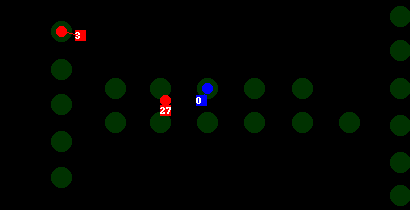

In [ ]:
chk.replay("1000")

In [ ]:
chk.plot("0")

KeyboardInterrupt: 

In [ ]:
chk.history["statistics"]

[{'block': 0.0,
  'targetReached': 152.0,
  'wrongTarget': 9.0,
  'jobDone': 0.0,
  'newPart': 5.0,
  'dispatch': 155.0,
  'taken_invalid': 498.0,
  '_jobdur_hgeo1': 60.0,
  '_jobnum_hgeo1': 2.0,
  '_jobdur_vgeo1': 90.0,
  '_jobnum_vgeo1': 3.0,
  '_njobs_agv2': 4.0,
  '_jobdur_hsn1_1': 236.5,
  '_jobnum_hsn1_1': 2.0,
  '_blocksec_agv1': 97.5,
  '_jobdur_wps_1': 217.0,
  '_jobnum_wps_1': 1.0,
  '_jobdur_hsn2_2': 130.0,
  '_jobnum_hsn2_2': 1.0,
  '_njobs_agv1': 3.0,
  '_jobdur_impact': 300.0,
  '_jobnum_impact': 2.0,
  '_njobs_agv0': 1.0},
 {'block': 0.0,
  'targetReached': 133.0,
  'wrongTarget': 5.0,
  'jobDone': 0.0,
  'newPart': 5.0,
  'dispatch': 137.0,
  'taken_invalid': 329.0,
  '_jobdur_hgeo1': 60.0,
  '_jobnum_hgeo1': 2.0,
  '_jobdur_vgeo1': 90.0,
  '_jobnum_vgeo1': 3.0,
  '_blocksec_agv1': 218.0,
  '_blocksec_agv0': 0.5,
  '_njobs_agv0': 6.0,
  '_njobs_agv2': 4.0,
  '_jobdur_hsn1_1': 137.5,
  '_jobnum_hsn1_1': 1.0,
  '_jobdur_hsn1_2': 198.0,
  '_jobnum_hsn1_2': 2.0,
  '_njobs_a

In [ ]:
[stat["block"] for stat in chk.history["statistics"]]

[0.0, 0.0, 0.0, 0.0, 0.0]